TODO:

- задебажить токенайз
- остальное добить

# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
- [Camping, in, Maine, for, the, weekend, ., Hey, Dad, ',', Mama, Loves, YOU, :, http://www.mamapalooza.com] 
2. Its american tradition bitch
- [Its, american, tradition, bitch]
3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
- [@ThroughTheVoid, They, love, it, !, The, only, pleasure, they, get, in, life, ., I, actually, do, that, ., I, ', m, sure, I, hear, a, tiny, squeak, ., ., ., Then, louder, ones]
4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
- [", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, !, Lol, <, -, -, -, ", ", I, tweet, because, I, ', m, happy, ',', I, tweet, because, I, ', m, free, ", ", LOL, !, "]
5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
- [Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammy, ', s, done, it, aga, ., ., http://tinyurl.com/lb5p6m]
6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
- [@dialloc, congrats, on, finding, your, way, over, ., it, may, be, slow, going, at, first, ., hang, in, there, ., it, ', s, kinda, cool, when, u, get, up, to, speed]
7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
- [iPhone, activation, delays, continue, Apple, offers, 30$, http://twt.gs/l3Ki]
8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
- [RT, @GoogleAtWork, Gmail, maximum, attachment, size, now, 25MB, http://bit.ly/62mjw, Nice, !, !, !]
9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
- [RT, ',', @acfou, The, Ads, Won, Awards, for, Crispin, ;, But, Did, Nothing, for, Client, BurgerKing, ', s, Sales, /, Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI]
10. Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
- [Hey, doll, !, Great, I, missed, True, Blood, yday, boo, lol, Rt, @FrankBanuat78, @jhillstephens, Hello, Sunshine, how, are, u, today, ?, :-)]
11. Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
- [Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, ., http://www.last.fm/music/Pogo/Wonderland]
12. @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
- [@mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in stock, to, those, that, just, walked, in, ., Can, ', t, do, both]
13. Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
- [Incoming, :, Frightened, Rabbit, ',', Sept, ., 22, (, Tucson, ), :, If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot, ., ., http://tinyurl.com/nz6xcv]
14. Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
- [Hey, @ginoandfran, please, greet, philip, !, (, GinoandFran, live, >, http://ustre.am/2YyQ, )]
15. Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
- [Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, ', corporate, ', taalgebruik, ., ., ., Best, vreemd, eigenlijk]

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [1]:
import matplotlib.pyplot as plt

In [29]:
from typing import List
from collections import Counter, defaultdict


class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        """
        Byte-Pair Encoding Tokenizer.

        Params:
            vocab_size: int - the size of desired extended vocabulary.

        Returns:
            new BPETokenizer.
        """

        self.vocab_size = vocab_size
        self.vocab = set()

        # word: frequency_from_corpus
        self.word_freqs = defaultdict(int)

        # word: its_splitted_version
        self.splits = {}

        # the dict will store appearing merges
        self.merges = {}

    def _analyze_corpus(self, corpus: list[str]) -> dict[str, int]:
        """
        Private method which calculates word frequencies from a give corpus.

        Param:
            corpus: list[str] - given corpus, sentence by sentence.

        Returns:
            word_freqs: dict[str, int] - word frequency dict.
        """
        word_freqs = defaultdict(int)
        for sentence in corpus:
            for word in sentence.split():
                word_freqs[word] += 1
        return word_freqs

    def _init_vocab(self, words: list[str]) -> set[str]:
        """
        Private method which just collect initial vocabulary.

        Params:
            words: list[str] - all words from initial corpus.

        Returns:
            vocab: set[str] - set of unique characters appeared in words.
        """
        vocab = set()
        for word in words:
            for c in word:
                vocab.add(c)
        vocab.add("<SEP>")
        return vocab

    def _get_freqs(self) -> Counter:
        """
        Private method which calculates frequecies for each pair from every word.

        Returns:
            pairs: Counter - where key is a pair of characters and value is the frequency of this pair.
        """
        pairs = Counter()
        for word, freq in self.word_freqs.items():
            split = self.splits[word]
            for i in range(len(split) - 1):
                pairs[split[i], split[i + 1]] += freq
        return pairs

    def _merge(
        self, pair: tuple[str, str], splits: dict[str, list[str]]
    ) -> dict[str, list[str]]:
        """
        Private method which merge adjacent characters in words if they are equal to pair.

        Params:
            pair: tuple[str,str] - pair of characters to merge.
            splits: dict[str, list[str]] - word: its_splitted_version

        Returns:
            splits_new: dict[str, list[str]] - updated version of splits.
        """
        l, r = pair
        splits_new = {}
        for word, split in splits.items():
            i = 0
            split_copy = split.copy()
            # apply merging
            while i < len(split_copy) - 1:
                if split_copy[i] == l and split_copy[i + 1] == r:
                    split_copy = split_copy[:i] + [l + r] + split_copy[i + 2 :]
                else:
                    i += 1
            splits_new[word] = split_copy
        return splits_new

    def train(self, corpus: list[str]) -> None:
        """
        Train the BPE.

        Params:
            corpus: list[str] - given corpus.

        Returns:
            None - just trains BPE.
        """
        self.word_freqs = self._analyze_corpus(corpus)
        self.vocab = self._init_vocab(words=self.word_freqs.keys())
        # "<SEP>" here means the end of word.
        # And a word is just a sequence of characters without spaces.
        self.splits = {
            word: [c for c in word] + ["<SEP>"] for word in self.word_freqs.keys()
        }

        while len(self.vocab) < self.vocab_size:
            all_pairs = self._get_freqs()
            if not all_pairs:
                # will end the loop if all possible merges are learned.
                break
            # get the most frequent pair to merge.
            most_popular_pair = all_pairs.most_common(1)[0][0]
            # merge.
            self.splits = self._merge(most_popular_pair, self.splits)
            # save learned merging.
            self.merges[most_popular_pair] = most_popular_pair[0] + most_popular_pair[1]
            # extend the vocabulary.
            self.vocab.add(most_popular_pair[0] + most_popular_pair[1])

    def tokenize(self, text: str) -> list[list[str]]:
        """
        Inference of BPE tokenizer.

        Params: 
            text: str - just text to tokenize.

        Returns:
            tokenized_text: list[list[str]] - each tokenized word is a subarray.
        """
        splited_text = {word: [c for c in word] + ["<SEP>"] for word in text.split()}

        for pair in self.merges.keys():
            splited_text = self._merge(pair, splited_text)

        tokenized_text = [splited_text[word] for word in text.split()]
        return tokenized_text

References:
1. Neural Machine Translation of Rare Words with Subword Units: https://arxiv.org/pdf/1508.07909.pdf
2. Some implementation of BPE from github: https://github.com/DolbyUUU/byte_pair_encoding_BPE_subword_tokenization_implementation_python
3. Byte-Pair Encoding: Subword-based tokenization algorithm: https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0

In [9]:
def get_vocab_size(text: list[str]):
    """Just helper function to get initial vocabulary size"""
    vocab = set()
    for t in text:
        for w in t.split():
            for c in w:
                vocab.add(c)
    return(len(vocab) + 1)

Just small example

In [27]:
text = ["low low low low low lowest lowest newer newer newer newer newer newer wider wider wider new new"]
bpe = BPETokenizer(20)
bpe.train(text)

In [28]:
bpe.tokenize("new low sun")

[['new', '<SEP>'], ['low<SEP>'], ['s', 'u', 'n', '<SEP>']]

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [7]:
"""Read the data"""
corpus = []
for i in range(1,6):
    with open(f"Assignment1_data/file{i}", "r") as file:
        for f in file.readlines():
            corpus.append(f)

In [10]:
get_vocab_size(corpus)

167

In [13]:
vocab_sizes = [get_vocab_size(corpus), 250, 500, 750, 1000]
avg_len_of_tweet = []

for s in vocab_sizes:
    bpe = BPETokenizer(vocab_size=s)
    bpe.train(corpus)
    tweet_len_sum = 0
    for tweet in corpus:
        res = bpe.tokenize(tweet)
        tweet_len_sum += len(sum(res, []))
    avg_len_of_tweet.append(tweet_len_sum / len(corpus))
    print(f"for vocab size = {s}, avg length of tweet = {avg_len_of_tweet[-1]}")

for vocab size = 167, avg length of tweet = 98.2909090909091
for vocab size = 250, avg length of tweet = 65.67727272727272
for vocab size = 500, avg length of tweet = 50.277272727272724
for vocab size = 750, avg length of tweet = 44.78636363636364
for vocab size = 1000, avg length of tweet = 41.18181818181818


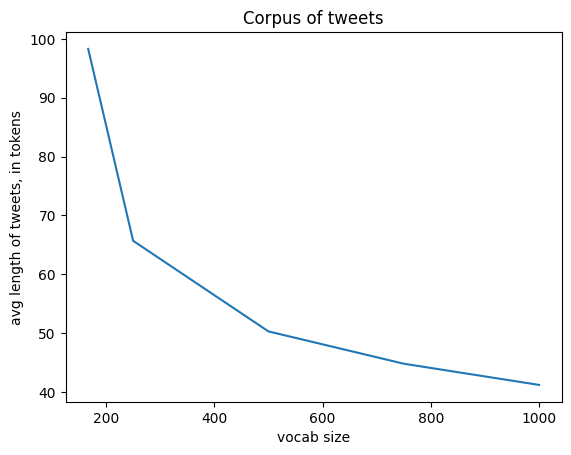

In [14]:
plt.plot(vocab_sizes, avg_len_of_tweet)
plt.title("Corpus of tweets")
plt.xlabel("vocab size")
plt.ylabel("avg length of tweets, in tokens")
plt.show()

**Conclusion**

As far as I can understand, we should find a balance between and ability to generalize the data and parse it to as meaningfull tokens as possible. In other words, obtained merges should be not very small to have meaningful tokens, and at the same time not all of them should be just complete or almost complete words to avoid overfitting.

So my conclusion based on the graph is that we may pick the value from 500 to 750 to reach these conditions.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [21]:
# Your code here
import json

data = []
with open('Assignment1_data/train.jsonl', 'r') as f:
    for line in f:
        data.append(str(json.loads(line)['passage']))

#just example
data[:2]

['«Вы́ставочный центр» — станция Московского монорельса. Расположена между станциями «Улица Академика Королёва» и «Улица Сергея Эйзенштейна». Находится на территории Останкинского района Северо-Восточного административного округа города Москвы. Переход на станцию  ВДНХ Калужско-Рижской линии. Названа в честь Всероссийского выставочного центра — названия ВДНХ с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .',
 'Вы́ставка достиже́ний наро́дного хозя́йства  , в 1959—1991 годах — Вы́ставка достиже́ний наро́дного хозя́йства СССР , в 1992—2014 годах — Всеросси́йский вы́ставочный центр ) — выставочный комплекс в Останкинском районе Северо-Восточного административного округа города Москвы, второй по величине выставочный комплекс в городе. Входит в 50 крупнейших выставочных центров мира. Ежегодно ВДНХ посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. Территориально ВДНХ объединена

Reference:
1. DaNetQA (SuperGlue) dataset: https://metatext.io/redirect/danetqa-(superglue)

In [23]:
russian_corpus = data[:500]
get_vocab_size(russian_corpus)

179

In [24]:
vocab_sizes = [get_vocab_size(russian_corpus), 250, 500, 750, 1000]
avg_len_of_sentence = []

for s in vocab_sizes:
    bpe = BPETokenizer(vocab_size=s)
    bpe.train(corpus)
    sentence_len_sum = 0
    for sentence in corpus:
        res = bpe.tokenize(sentence)
        sentence_len_sum += len(sum(res, []))
    avg_len_of_sentence.append(sentence_len_sum / len(corpus))
    print(f"for vocab size = {s}, avg length of tweet = {avg_len_of_sentence[-1]}")

for vocab size = 179, avg length of tweet = 86.4090909090909
for vocab size = 250, avg length of tweet = 65.67727272727272
for vocab size = 500, avg length of tweet = 50.277272727272724
for vocab size = 750, avg length of tweet = 44.78636363636364
for vocab size = 1000, avg length of tweet = 41.18181818181818


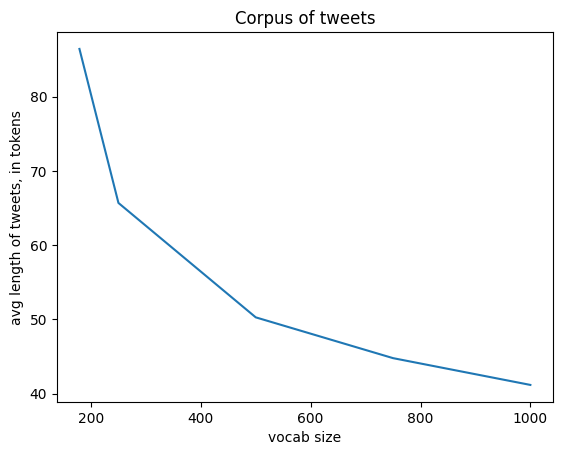

In [25]:
plt.plot(vocab_sizes, avg_len_of_sentence)
plt.title("Corpus of tweets")
plt.xlabel("vocab size")
plt.ylabel("avg length of tweets, in tokens")
plt.show()

**Conclusion**

Seems like there is no a big difference between the results. Such situation may occur do to similairy between english language and spoken russian in some syntactic way. So the the choice between 500 and 750 might also be good.

## Why the avg len of sentence decreasing while vocab size is increasing?

**Answer:**

When common pairs/substrings are merged into one token, the length of the sentences, when represented by these tokens, decreases as each token represents a larger part of the sentence. Simultaneously, the size of the vocabulary increases because these new, larger tokens are being added to it.


